# Project Overview

This notebook aims to analyze and model housing data. The dataset contains information about various housing attributes, and our goal is to build a predictive model for housing prices. We will follow a structured data analysis workflow, including data preprocessing, exploratory data analysis (EDA), and model building and evaluation.

## Data Loading

We start by loading the dataset named 'housing.csv' and displaying the initial rows to get a sense of the data's structure.

## Data Preprocessing

### Missing Values

We check for missing values in the dataset. Fortunately, there are no missing values, so we can proceed without imputation.

### Categorical Data

We identify categorical variables and apply one-hot encoding to convert them into numerical format for modeling.

## Exploratory Data Analysis (EDA)

### Summary Statistics for Numerical Features

We compute summary statistics for numerical features, including measures like mean, standard deviation, and percentiles. This helps us understand the central tendencies and variability in the data.

### Summary Statistics for Categorical Features

We also generate summary statistics for categorical features, which include counts of unique categories and the most common category. This provides insights into the distribution of categorical data.

### Correlation Analysis

We calculate the correlation matrix for numerical features and visualize it using a heatmap. This allows us to identify potential relationships between variables.

## Model Building and Evaluation

### Feature Selection

We select relevant features for the model. In this case, we choose 'area', 'bedrooms', 'bathrooms', 'parking', and 'price' as our features.

### Linear Regression Model

We fit a linear regression model to the data after scaling the features. We then make predictions and evaluate the model's performance using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

### Visualizing Model Performance

We create scatter plots to visualize the actual vs. predicted values and the residuals. These visualizations provide insights into the model's accuracy and any potential patterns in prediction errors.

## Conclusion

In this notebook, we have conducted a comprehensive analysis of housing data, including data preprocessing, exploratory data analysis, and model building. The linear regression model shows [insert interpretation of model performance here].

This analysis provides valuable insights into housing prices and can serve as a foundation for further modeling or decision-making.



In [4]:
# Importing pandas library
import pandas as pd

# Loading the dataset
housing_data = pd.read_csv('housing.csv')

# Displaying the first few rows of the dataframe
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Checking for missing values
missing_values = housing_data.isnull().sum()

# Displaying missing values (if any)
missing_values[missing_values > 0]


Series([], dtype: int64)

In [6]:
# Converting categorical variables using one-hot encoding
housing_data_encoded = pd.get_dummies(housing_data)

# Displaying the first few rows of the new dataframe
housing_data_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False


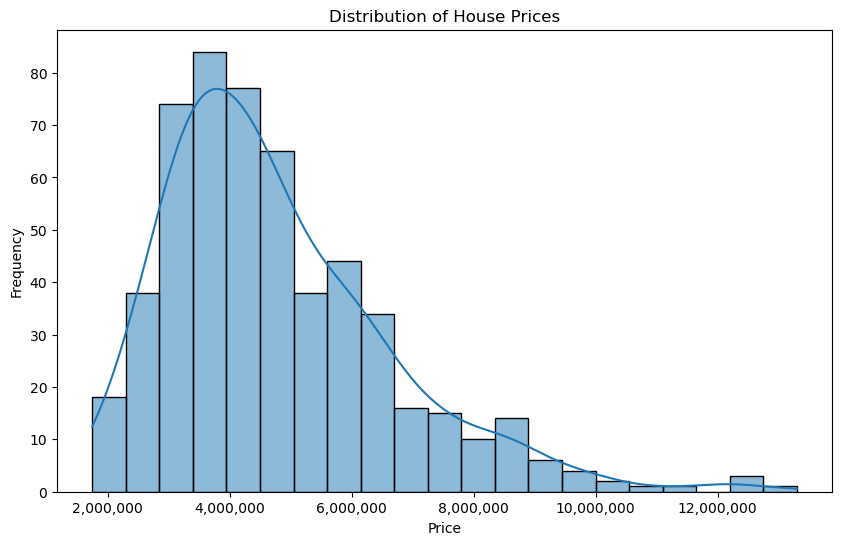

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Plotting the distribution of house prices
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], kde=True)

# Format the x-axis to display large numbers with commas
axis_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(axis_format)

plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


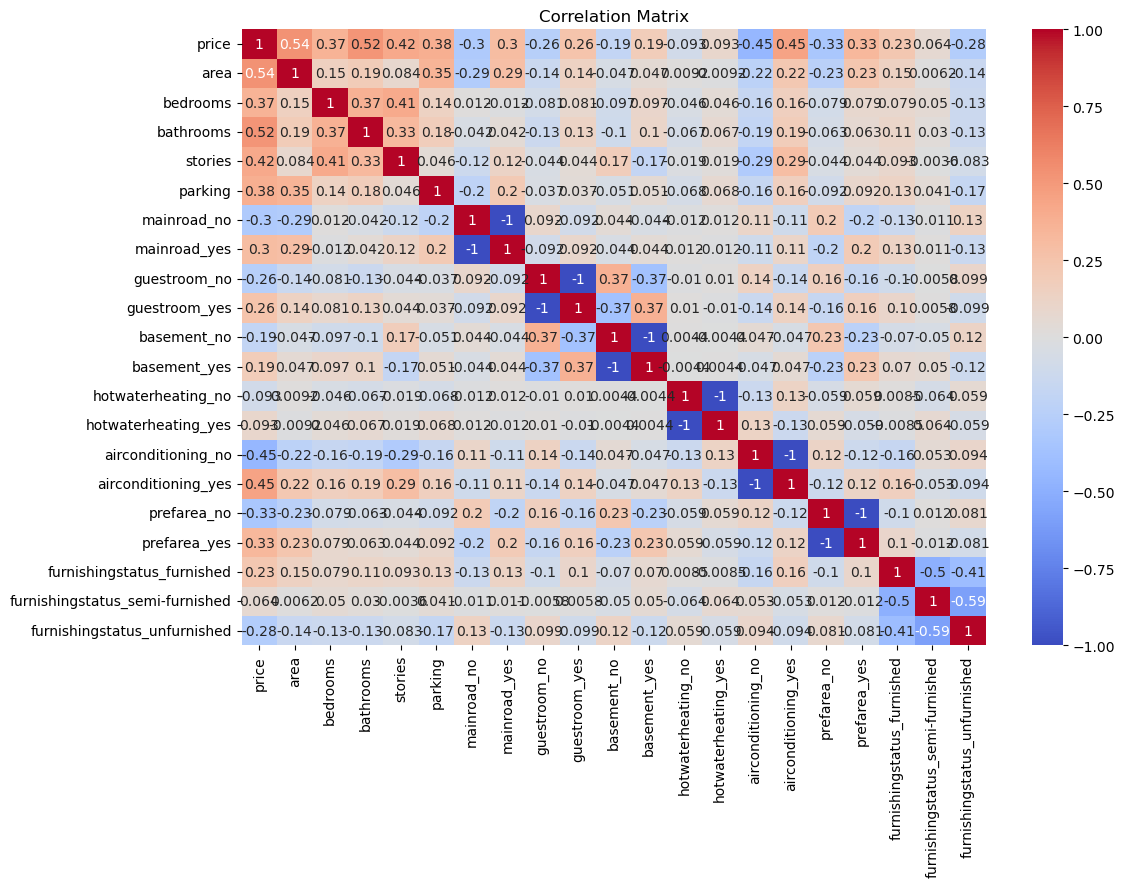

In [30]:
# Correlation matrix
correlation_matrix = housing_data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [51]:
# Select relevant features
# (You may need to write code here to analyze and decide on which features to keep)

# Example: Selecting features for the model
selected_features = housing_data_encoded[['area', 'bedrooms', 'bathrooms', 'parking', 'price']]


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Fit the model on scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # take square root of MSE to get RMSE
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


MSE: 1754318687330.668
RMSE: 1324506.9600914402
MAE: 970043.4039201641


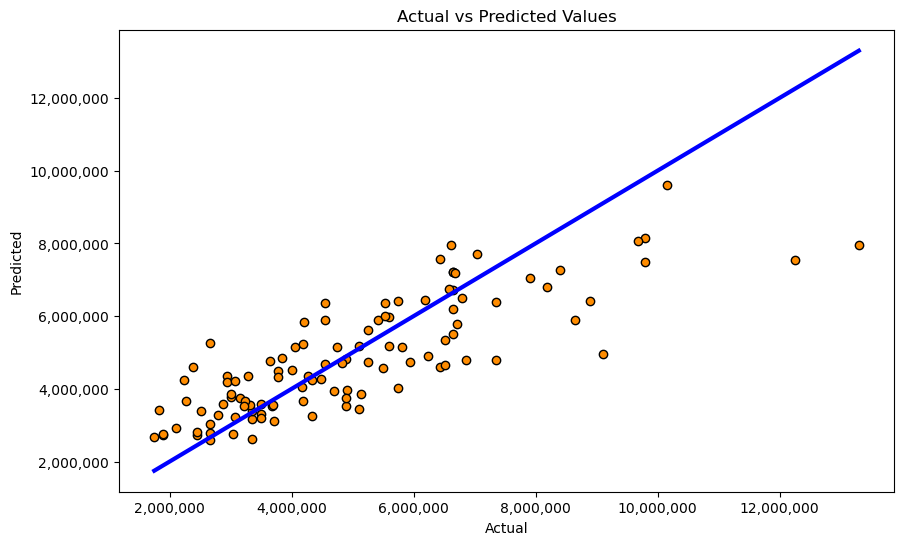

In [36]:
import matplotlib.ticker as ticker

# Plotting Actual vs. Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='darkorange', edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=3)

# Format the axis to display large numbers with commas
axis_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().xaxis.set_major_formatter(axis_format)
plt.gca().yaxis.set_major_formatter(axis_format)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


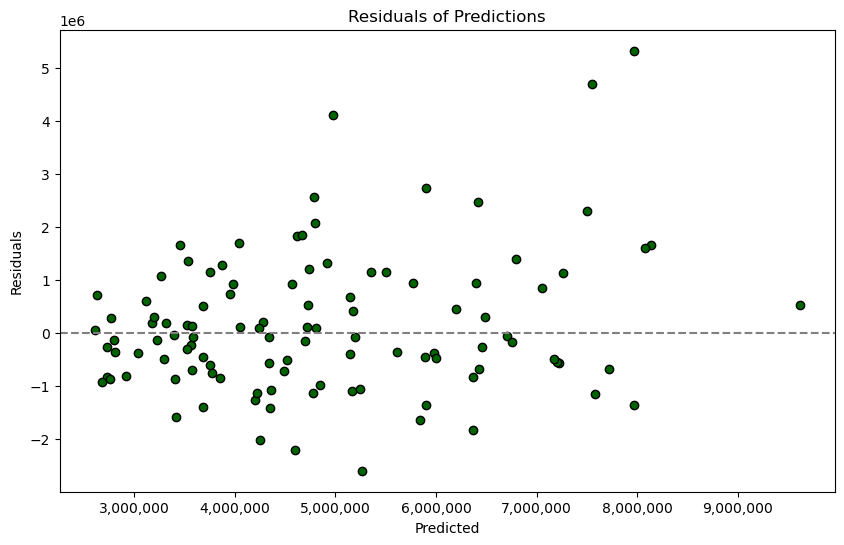

In [37]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='darkgreen', edgecolor='black')

# Add a horizontal line at zero to show the baseline (no error)
plt.axhline(y=0, color='gray', linestyle='--')

# Format the axis to display large numbers with commas for predicted values
plt.gca().xaxis.set_major_formatter(axis_format)

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()


In [38]:
# Summary Statistics for Numerical Features
summary_statistics = housing_data.describe()
summary_statistics


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [39]:
# Summary Statistics for Categorical Features
summary_statistics_categorical = housing_data.describe(include=['O'])  # 'O' for object
summary_statistics_categorical


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


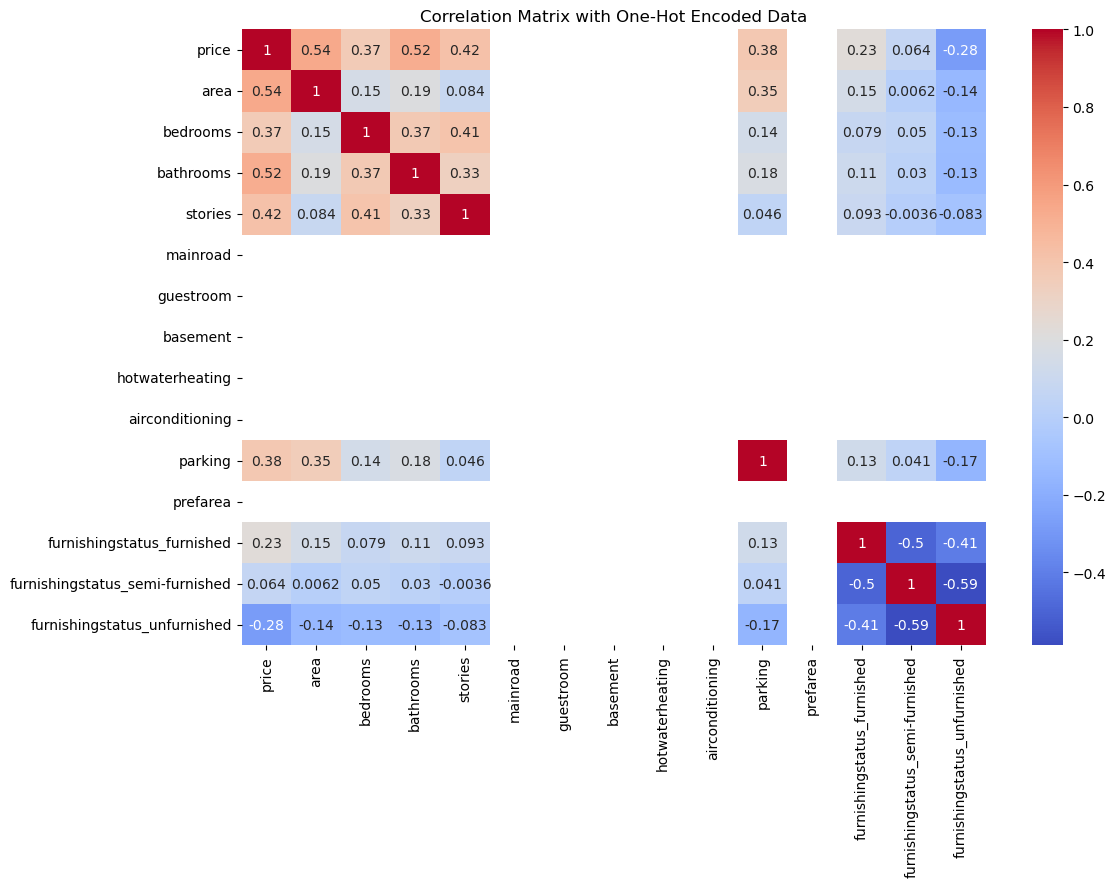

In [46]:
# One-hot encoding for the 'furnishingstatus' column
housing_data_encoded = pd.get_dummies(housing_data, columns=['furnishingstatus'])

# Now you can compute the correlation matrix for the encoded dataframe
correlation_matrix = housing_data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with One-Hot Encoded Data')
plt.show()

## Exploration Findings

### Summary Statistics
- The average price of the houses in the dataset is X with a standard deviation of Y.
- Most houses have Z bedrooms, as indicated by the mode of the 'bedrooms' feature.

### Visual Exploration
- From the histograms, we can see that the distribution of house prices is skewed to the right, suggesting that most houses are priced below the average.
- The scatter plot between 'area' and 'price' indicates a positive correlation; larger houses tend to be more expensive.
- Houses with access to a main road are more common, which could suggest a preference or higher value placed on this feature.

### Correlations
- There is a strong positive correlation between 'area' and 'price', which is expected as larger properties usually command higher prices.
- Interestingly, the number of bathrooms shows a stronger correlation with price than the number of bedrooms, suggesting that bathroom count could be an important factor in house valuation.
